# ResNet For Greyscale Images

I used [this blog post](https://zablo.net/blog/post/using-resnet-for-mnist-in-pytorch-tutorial) as a guide.

The `resnet_mnist.py` script pulls functions and classes from the local scripts `util.py` (contains torch DataLoader classes/code and some helper functions) and `MnistResNet.py`(the modified ResNet class)

The warnings I'm ignoring are of the type `UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples`. 
See [here](# https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi) for an explanation.

In [1]:
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

%run resnet_mnist.py --epochs 20 --plot


Epoch 1/20, training loss: 2.241005200892687, validation loss: 2.2779159545898438
	     precision: 0.1342
	        recall: 0.1606
	            F1: 0.0927
	      accuracy: 0.1573



Epoch 2/20, training loss: 2.09476587921381, validation loss: 2.2530336380004883
	     precision: 0.1355
	        recall: 0.2007
	            F1: 0.1083
	      accuracy: 0.2025



Epoch 3/20, training loss: 1.966054830700159, validation loss: 2.1225342750549316
	     precision: 0.3367
	        recall: 0.3227
	            F1: 0.2644
	      accuracy: 0.3305



Epoch 4/20, training loss: 1.8362649995833635, validation loss: 1.971631646156311
	     precision: 0.5832
	        recall: 0.4830
	            F1: 0.4629
	      accuracy: 0.4891



Epoch 5/20, training loss: 1.751022033393383, validation loss: 1.8996397256851196
	     precision: 0.5371
	        recall: 0.5564
	            F1: 0.4948
	      accuracy: 0.5607



Epoch 6/20, training loss: 1.7013735231012106, validation loss: 1.8926124572753906
	     precision: 0.6436
	        recall: 0.5599
	            F1: 0.5385
	      accuracy: 0.5654



Epoch 7/20, training loss: 1.6724506113678217, validation loss: 1.873325228691101
	     precision: 0.5987
	        recall: 0.5741
	            F1: 0.5273
	      accuracy: 0.5855



Epoch 8/20, training loss: 1.6537961214780807, validation loss: 1.7613826990127563
	     precision: 0.6863
	        recall: 0.6925
	            F1: 0.6515
	      accuracy: 0.6997



Epoch 9/20, training loss: 1.6280407942831516, validation loss: 1.774071216583252
	     precision: 0.7462
	        recall: 0.6831
	            F1: 0.6721
	      accuracy: 0.6870



Epoch 10/20, training loss: 1.5921822916716337, validation loss: 1.7049269676208496
	     precision: 0.8019
	        recall: 0.7528
	            F1: 0.7359
	      accuracy: 0.7556



Epoch 11/20, training loss: 1.5627293549478054, validation loss: 1.6845183372497559
	     precision: 0.8074
	        recall: 0.7788
	            F1: 0.7593
	      accuracy: 0.7782



Epoch 12/20, training loss: 1.548636319115758, validation loss: 1.8032238483428955
	     precision: 0.7236
	        recall: 0.6612
	            F1: 0.6320
	      accuracy: 0.6575



Epoch 13/20, training loss: 1.5358218774199486, validation loss: 1.6917515993118286
	     precision: 0.8323
	        recall: 0.7691
	            F1: 0.7623
	      accuracy: 0.7694



Epoch 14/20, training loss: 1.5279225632548332, validation loss: 1.7890182733535767
	     precision: 0.7767
	        recall: 0.6673
	            F1: 0.6585
	      accuracy: 0.6695



Epoch 15/20, training loss: 1.5208123121410608, validation loss: 1.7175074815750122
	     precision: 0.8294
	        recall: 0.7422
	            F1: 0.7341
	      accuracy: 0.7431



Epoch 16/20, training loss: 1.5168156120926142, validation loss: 1.6935842037200928
	     precision: 0.8104
	        recall: 0.7660
	            F1: 0.7446
	      accuracy: 0.7666



Epoch 17/20, training loss: 1.5120012760162354, validation loss: 1.646281123161316
	     precision: 0.8449
	        recall: 0.8153
	            F1: 0.8005
	      accuracy: 0.8147



Epoch 18/20, training loss: 1.5074704959988594, validation loss: 1.627843976020813
	     precision: 0.8584
	        recall: 0.8326
	            F1: 0.8215
	      accuracy: 0.8339



Epoch 19/20, training loss: 1.5025779381394386, validation loss: 1.6532107591629028
	     precision: 0.8548
	        recall: 0.8053
	            F1: 0.7988
	      accuracy: 0.8071



Epoch 20/20, training loss: 1.4984664488583803, validation loss: 1.5885978937149048
	     precision: 0.8853
	        recall: 0.8717
	            F1: 0.8627
	      accuracy: 0.8711
Training time: 283.8797695636749s


<Figure size 640x480 with 1 Axes>


Training time: 58.20293974876404s


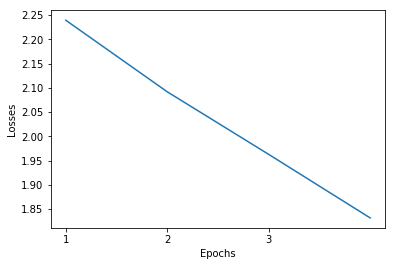

In [15]:
# Try again and hopefully the plot will show
%matplotlib inline
%run resnet_mnist.py --epochs 4 --plot --quiet-scores

# Submission generation

In [2]:
import torch
import argparse
import numpy as np
import os
import pandas as pd

# Local imports
import util
from MnistResNet import MnistResNet

# parser = argparse.ArgumentParser(description='Write submission for ResNet for single channel ims')
# parser.add_argument('model_weights', type=str, help='MnistResNet weights to load')
# args = parser.parse_args()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load model
model = MnistResNet().to(device)
# model.load_state_dict(torch.load(args.model_weights))
model.load_state_dict(torch.load('models/resnet_mnist-e100.pt'))

# Load data
X_loader = util.load_submission_data()
# X_loader.to(device)

with torch.no_grad():
    for i, X in enumerate(X_loader):
        X  = X.to(device)
        outputs = model(X) # get prediction from network
        ypred = torch.max(outputs, 1)[1] # get class from network's prediction




In [11]:
x = ypred.to('cpu')
x = x.numpy()
x[0]

7

In [20]:
from datetime import date
dt = str(date.today())
outpath, outname = os.path.split('models/resnet_mnist-e100.pt')
outname = os.path.splitext(outname)[0] + '.csv'
outname = str(date.today()) + '_submission-' + outname
os.path.join(outpath, outname)

'models/2019-03-17_submission-resnet_mnist-e100.csv'